Gradient descent basis:

$f(x)-f(a) = \nabla f(a)*(x-a)$

when $x$ is around $a$ . (First term of tailor series)

Among $||x-a|| = R$, $x-a=\mu\nabla f(a) (\mu = R/||\nabla f(x)||)$ will make $f(x)-f(a)$ increase the fastest (1). 

$arg \underset{x-a}{max}(f(x)-f(a)) = \frac{R}{||\nabla f(a)||}\nabla f(a)   = \mu \nabla f(a)$ 
subject to $||x-a||=R$

The gradient vector $\nabla f(x)$ points in the direction of the steepest ascent (2).

The directional derivative vector of $f(x)$ with regard to a unit vector u is:

$D_uf(x) = \underset{h->0}{limit}\frac{f(x+h*u)-f(x)}{h} = \nabla f(x) *u$

the series $a_1 = a_0+\mu\nabla f(a_0), a_2=a_1+\mu\nabla f(a_1)...$ can be used to efficiently increase $f(a)$ step by step

Visualisation of Adam optimizer

# Loss function

$f(x, y) = x^2+y^2$

# Gradient:

$\nabla f(x) = 2*x; \nabla f(y)= 2*y$


In [40]:
def loss_fn(params):
    x, y = params
    return x**2 - y**2


def gradient(params):
    x, y = params
    return np.array([2 * x, -2 * y])

# x, y


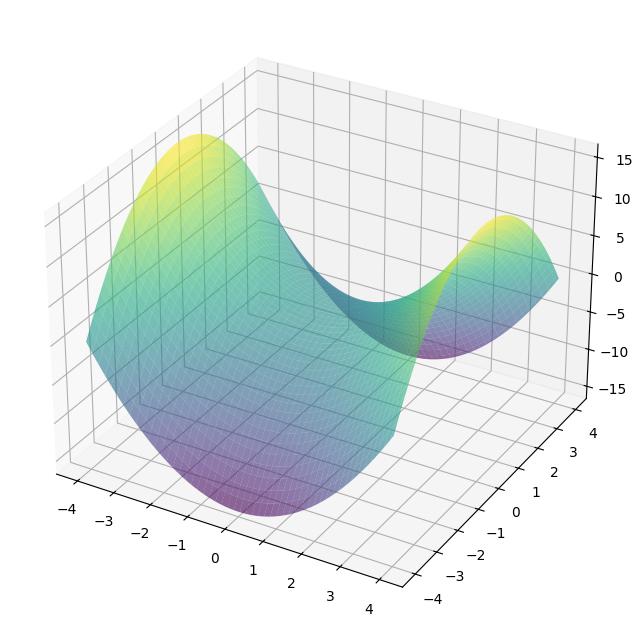

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)
Z = loss_fn((X, Y))
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

# Plot the loss surface
ax.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.6, edgecolor="none")

In [83]:
def sgd(params, gradients, lr):
    new_params = params - gradients * lr
    return new_params


def adam2(params, grads, m, v, t, lr=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8):
    m = beta1 * m + (1 - beta1) * grads
    v = beta2 * v + (1 - beta2) * grads**2
    m_hat = m / (1 - beta1**t)
    v_hat = v / (1 - beta2**t)
    params = params - lr * m_hat / (np.sqrt(v_hat) + epsilon)
    return params, m, v



def rmsprop(params, grads, v, lr, beta=0.9, epsilon=1e-8):
    v = beta * v + (1 - beta) * grads**2
    params = params - lr / (np.sqrt(v) + epsilon) * grads
    return params, v


# random array of shape (2,) from -4 to 4
init_params = np.random.uniform(low=-4, high=4, size=(2,))

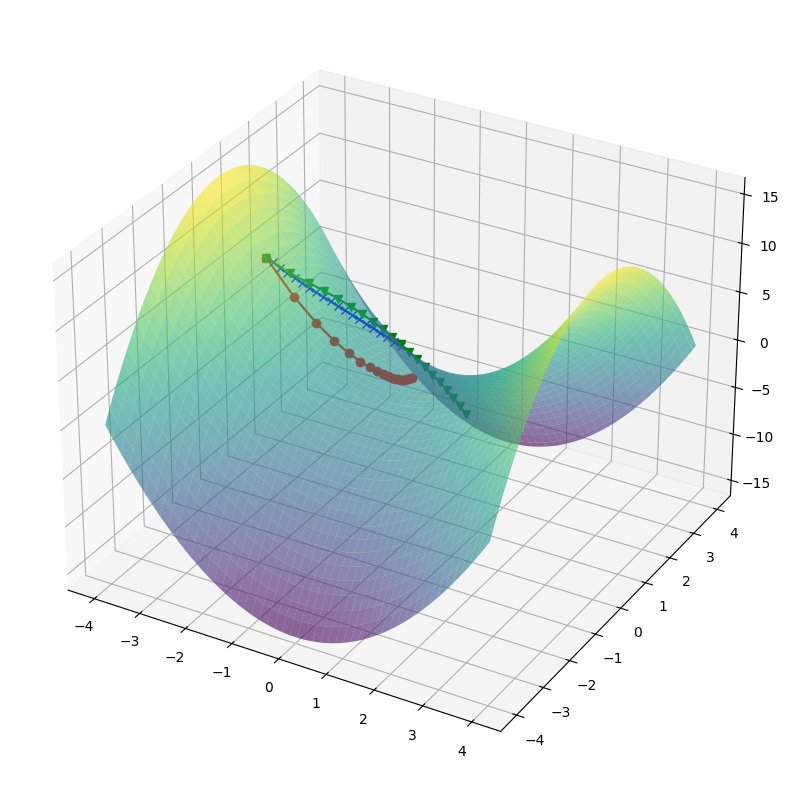

In [101]:
init_params = [-3, 0.01]
steps_adam = [init_params.copy()]
steps_sgd = [init_params.copy()]
loss_sgd = [loss_fn(init_params)]
steps_rmsprop = [init_params.copy()]
loss_rmsprob = [loss_fn(init_params)]
m_adam = np.zeros_like(init_params)
v_adam = np.zeros_like(init_params)
v_rms = np.zeros_like(init_params)
lr = 0.1
loss_adam = [loss_fn(init_params)]

for step in range(1, 20):
    params_sgd = sgd(steps_sgd[step - 1], gradient(steps_sgd[step - 1]), lr)
    loss_sgd.append(loss_fn(params_sgd))
    steps_sgd.append(params_sgd)
    params_adam, m_adam, v_adam = adam(
        steps_adam[step - 1],
        gradient(steps_adam[step - 1]),
        m=m_adam,
        v=v_adam,
        t=step,
        lr=lr,
    )
    params_rms, v_rms = rmsprop(
        steps_rmsprop[step - 1], gradient(steps_rmsprop[step - 1]), v_rms, lr
    )
    steps_rmsprop.append(params_rms)
    loss_rmsprob.append(loss_fn(params_rms))
    steps_adam.append(params_adam)
    loss_adam.append(loss_fn(params_adam))

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection="3d")
steps_sgd = np.array(steps_sgd)

# Plot the loss surface
ax.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.6, edgecolor="none")
steps_adam = np.array(steps_adam)
steps_rmsprop = np.array(steps_rmsprop)
# Plot the SGD path
ax.plot(
    steps_sgd[:, 0], steps_sgd[:, 1], loss_sgd, marker="o", color="red", label="SGD"
)
ax.plot(
    steps_adam[:, 0],
    steps_adam[:, 1],
    loss_adam,
    marker="x",
    color="blue",
    label="Adam",
)
ax.plot(
    steps_rmsprop[:, 0],
    steps_rmsprop[:, 1],
    loss_rmsprob,
    marker="v",
    color="green",
    label="RMS",
)